In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
# pd.set_option('display.float_format','{:.4f}'.format)

In [2]:
data = pd.read_csv('data/nike_air_force(pre).csv')

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
print(data.shape)
data.head()

(89221, 14)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
3,235,179000,2021-05-22,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6
4,245,189000,2021-05-23,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6


In [5]:
pd.pivot_table(data, index='product', values='price', aggfunc='mean')

,price
product,
(GS) Nike Air Force 1 LE White,1.200469e+05
(GS) Nike Air Force 1 LV8 3 Wheat 2019,1.459375e+05
(GS) Nike Air Force 1 LV8 Double Swoosh,1.988333e+05
(GS) Nike Air Force 1 LV8 White Black,1.337742e+05
(GS) Nike Air Force 1 Low LV8 EMB NBA 75th Anniversary,1.221500e+05
...,...
Nike x Supreme Air Force 1 Mid NBA Black,3.221500e+05
Nike x Supreme Air Force 1 Mid NBA White,4.300606e+05
Nike x Travis Scott Air Force 1 Low Cactus Jack,6.199259e+05


In [6]:
data.groupby('product')['price'].mean()

product
(GS) Nike Air Force 1 LE White                            1.200469e+05
(GS) Nike Air Force 1 LV8 3 Wheat 2019                    1.459375e+05
(GS) Nike Air Force 1 LV8 Double Swoosh                   1.988333e+05
(GS) Nike Air Force 1 LV8 White Black                     1.337742e+05
(GS) Nike Air Force 1 Low LV8 EMB NBA 75th Anniversary    1.221500e+05
                                                              ...     
Nike x Supreme Air Force 1 Mid NBA Black                  3.221500e+05
Nike x Supreme Air Force 1 Mid NBA White                  4.300606e+05
Nike x Travis Scott Air Force 1 Low Cactus Jack           6.199259e+05
Nike x Travis Scott Air Force 1 Low Sail                  1.579286e+06
Nike x Travis Scott Air Force 1 Low White                 1.660200e+06
Name: price, Length: 334, dtype: float64

## EDA

In [7]:
df = data.copy()

### Missing Value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89221 entries, 0 to 89220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   size           89221 non-null  int64 
 1   price          89221 non-null  int64 
 2   date           89221 non-null  object
 3   product        89221 non-null  object
 4   release_date   89221 non-null  object
 5   color          89221 non-null  object
 6   release_price  89221 non-null  int64 
 7   type           89221 non-null  object
 8   brand          89221 non-null  object
 9   category       89221 non-null  object
 10  number         89221 non-null  int64 
 11  wish           89221 non-null  int64 
 12  review         89221 non-null  int64 
 13  transactions   89221 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 9.5+ MB


In [9]:
df = df[df['number'].notnull()]

In [10]:
df = df.reset_index(drop=True)

In [11]:
print(df.shape)
df.head()

(89221, 14)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3
3,235,179000,2021-05-22,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6
4,245,189000,2021-05-23,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6


In [12]:
len(set(df['product']))

334

### type 생성

In [13]:
# df['product'].str.contains(' Low', regex=False).value_counts()

In [14]:
# df.loc[df['product'].str.contains(' Low', regex=False), 'type'] = 'Low'

In [15]:
# df.loc[df['product'].str.contains(' Low', regex=False) == False, 'product'].value_counts()

In [16]:
# df.loc[df['product'].str.contains('Dunk low', regex=False), 'type'] = 'Low'

In [17]:
# df.loc[df['type'] == 'Low'].value_

### transactions

In [18]:
# df = df[df['transactions'] > 50]

In [19]:
df['transactions'].value_counts()

5950    11900
1450     8700
4950     4950
3664     3664
2950     2950
        ...  
1          25
24         24
23         23
19         19
4          16
Name: transactions, Length: 168, dtype: int64

In [20]:
df[df['transactions'] == 1450]['product'].value_counts()

Nike Air Force 1 '07 PRM Popcorn            1450
Nike x Supreme Air Force 1 Low Flax         1450
Nike Air Force 1 '07 White Black            1450
(GS) Nike Air Force 1 LE White              1450
Nike Air Force 1 '07 Craft Mantra Orange    1450
(W) Nike Air Force 1 '07 LV8 Hangul Day     1450
Name: product, dtype: int64

<AxesSubplot:xlabel='transactions', ylabel='Count'>

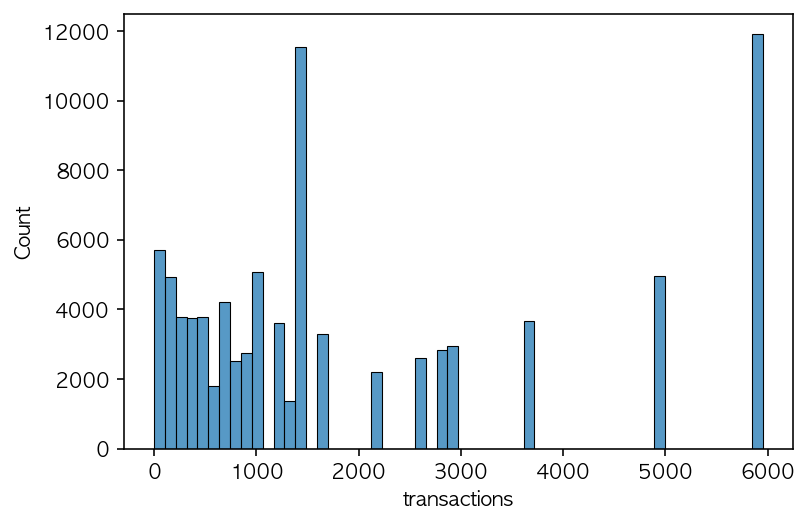

In [21]:
sns.histplot(df['transactions'])

<AxesSubplot:xlabel='transactions', ylabel='Count'>

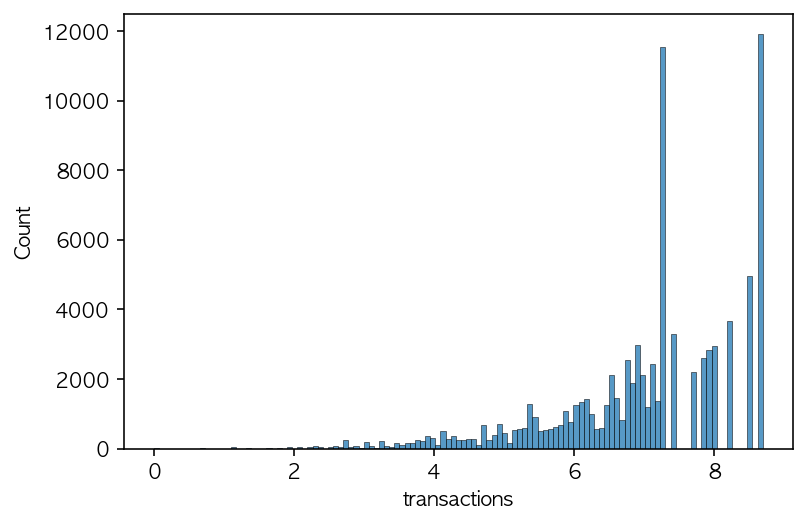

In [22]:
sns.histplot(np.log(df['transactions']))

### review

<AxesSubplot:xlabel='review', ylabel='Count'>

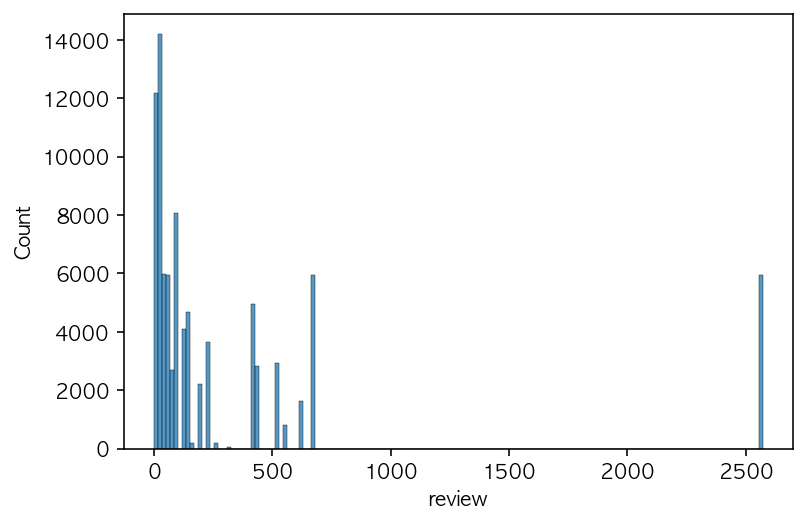

In [23]:
sns.histplot(df['review'])

<AxesSubplot:xlabel='review', ylabel='Count'>

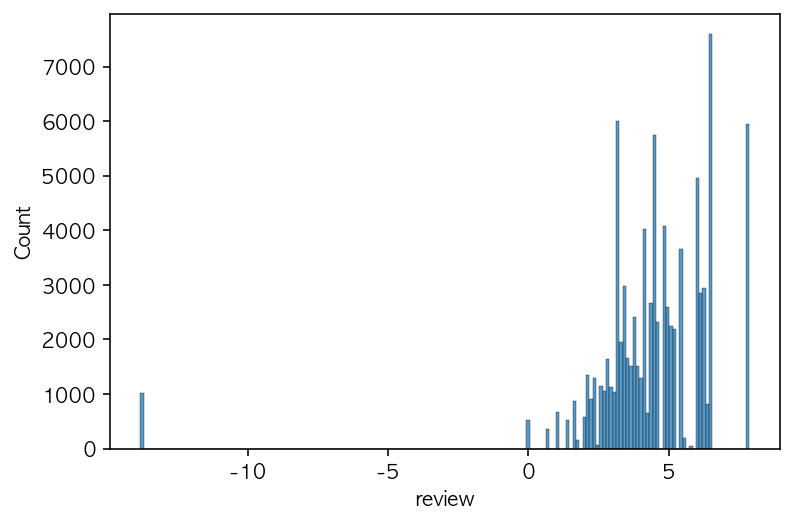

In [24]:
sns.histplot(np.log(df['review'] + 0.000001))

In [25]:
df['review_log'] = np.log(df['review'] + 0.000001)

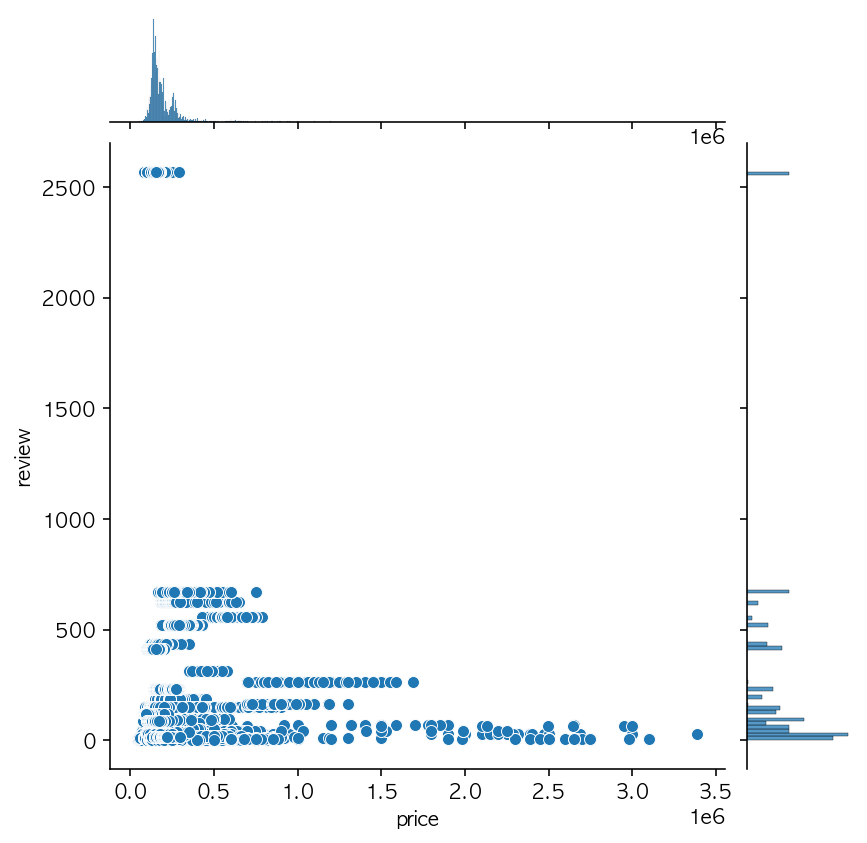

In [26]:
sns.jointplot( df['price'], df['review'])
plt.show()

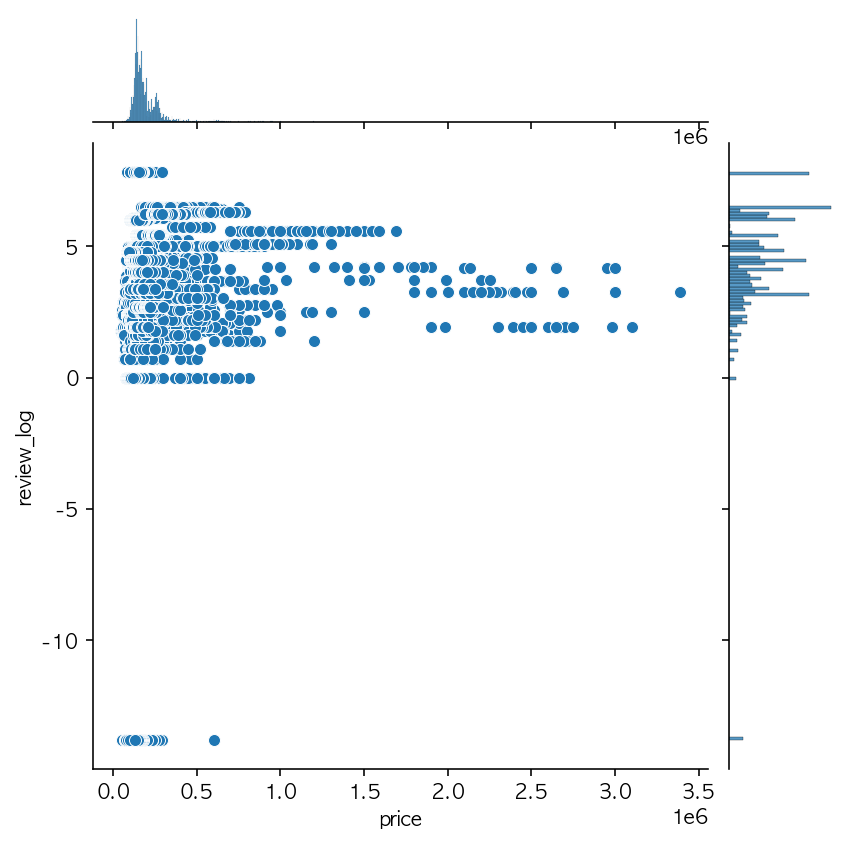

In [27]:
sns.jointplot( df['price'], df['review_log'])
plt.show()

In [28]:
df[['review_log', 'review']]

,review_log,review
0,-1.381551e+01,0
1,-1.381551e+01,0
2,-1.381551e+01,0
3,9.999995e-07,1
4,9.999995e-07,1
...,...,...
89216,2.708050e+00,15
89217,2.708050e+00,15
89218,2.708050e+00,15
89219,2.708050e+00,15


In [29]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-13.815511


### wish

<AxesSubplot:xlabel='wish', ylabel='Count'>

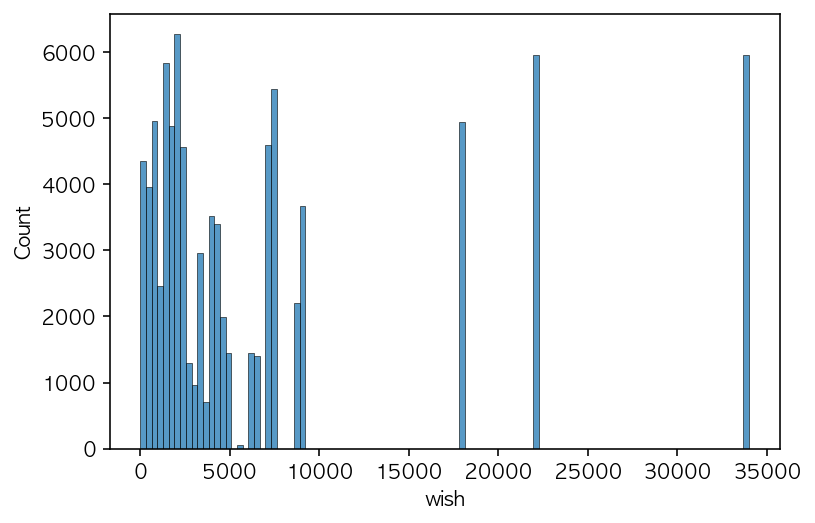

In [30]:
sns.histplot(df['wish'])

<AxesSubplot:xlabel='wish', ylabel='Count'>

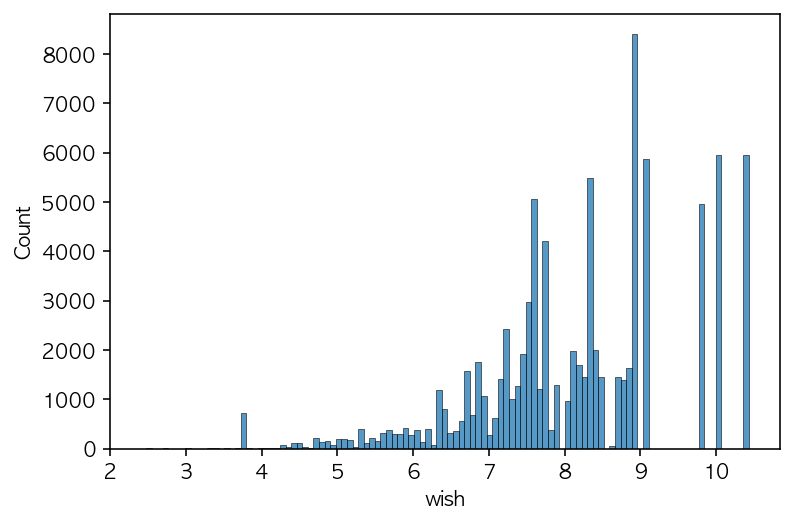

In [31]:
sns.histplot(np.log(df['wish'] + 0.000001))

In [32]:
df['wish_log'] = np.log(df['wish'] + 0.000001)

In [33]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-13.815511,4.343805


### date
- min_date 추가
- max_date 추가

In [34]:
# min_max_date = pd.pivot_table(df, index='product', values='date', aggfunc=(min, max))

In [35]:
# min_max_date = pd.DataFrame({'product': min_max_date.index, 'start_date': min_max_date['min'], 'end_date': min_max_date['max']}).reset_index(drop=True)

In [36]:
# min_max_date

In [37]:
# df = pd.merge(df, min_max_date, how='left', on='product')

In [38]:
# df['start_date']

In [39]:
# df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]['product'].value_counts()

In [40]:
# df[df['product'] == 'Nike Dunk Low Triple White']

In [41]:
# df = df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]

In [42]:
# df.reset_index(drop=True, inplace=True)

### release_price

In [43]:
df['release_price'].value_counts().sort_index()

59000        65
69800        25
75000        31
78100        28
78200        16
79000       208
81600       151
89000       269
89600         1
96300       113
99000        58
102200       16
108200      106
108300      249
109000     1696
114100       30
114200       31
114300      274
115000       34
115500     8150
119000      489
120200      198
120300       16
129000    21535
132300      375
132400      558
135800        5
137200     1426
138400        2
139000    16029
144300      114
144400      100
148100      169
148500      270
149000     3680
149400       16
149600      463
156300      257
156500      107
159000     6511
159900      987
163000      301
168300      111
169000    14741
176600       19
178700      132
179000     2950
179200        9
180400      325
180500     1470
186800        6
189000     1017
192400        7
198400      125
198600       40
199000      376
204400       20
209000      823
216500       21
219000      372
228500       43
240500       59
240700  

In [44]:
print(df.shape)
df.head()

(89221, 16)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-1.381551e+01,4.343805
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-1.381551e+01,4.343805
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-1.381551e+01,4.343805
3,235,179000,2021-05-22,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,9.999995e-07,5.805135
4,245,189000,2021-05-23,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,9.999995e-07,5.805135


<AxesSubplot:xlabel='release_price', ylabel='Count'>

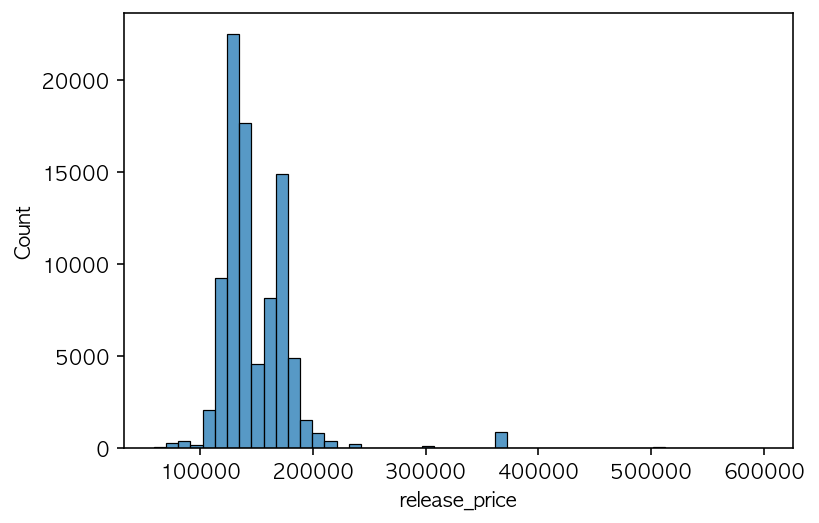

In [45]:
sns.histplot(df['release_price'], bins=50)

### size
- size_target 컬럼 생성
- size_type 컬럼 생성

In [46]:
# GS : grade school 초등학생 사이즈
# PS : Pre school 미취학 아동 사이즈
# TD : Toddler 유야용 사이즈
# W : Womans 여성 사이즈

In [47]:
set(df['product'])

{'(GS) Nike Air Force 1 LE White',
 '(GS) Nike Air Force 1 LV8 3 Wheat 2019',
 '(GS) Nike Air Force 1 LV8 Double Swoosh ',
 '(GS) Nike Air Force 1 LV8 White Black',
 '(GS) Nike Air Force 1 Low LV8 EMB NBA 75th Anniversary',
 '(GS) Nike Air Force 1 Low White',
 '(GS) Nike Air Force 1 S50 Black White',
 '(GS) Nike Air Force 1 S50 White Deep Royal',
 '(GS) Nike Air Force 1 White Black',
 '(GS) Nike Air Force 1 White University Red',
 "(GS) Nike x Space Jam: A New Legacy Air Force 1 '07 Tune Squad",
 '(PS) Nike Force 1 LE Triple White',
 '(PS) Nike Force 1 Low Triple White',
 '(PS) Nike Force 1 Low Wheat',
 '(PS) Nike Force 1 White Black',
 '(PS) Nike x Stussy Force 1 Low Fossil',
 '(PS) Nike x Stussy Force 1 Low Triple Black',
 '(PS) Nike x Travis Scott Force 1 Low Cactus Jack',
 '(TD) Nike Force 1 Low Acorn 2021',
 '(TD) Nike Force 1 Low Wheat',
 '(TD) Nike Force 1 White Fuchsia Glow',
 '(TD) Nike x Off-White Air Force 1 Low Black White',
 '(TD) Nike x Off-White Air Force 1 Low Volt',
 '

In [48]:
df.loc[(df['product'].str.contains('(GS)',regex = False)) | (df['product'].str.contains('(W)',regex = False)), 'size_target'] = 'Female'
df.loc[(df['product'].str.contains('(PS)',regex = False)) | (df['product'].str.contains('(TD)',regex = False)), 'size_target'] = 'Kids'

In [49]:
df.loc[(df['size_target'] != 'Female') & (df['size_target'] != 'Kids'), 'size_target'] = 'Male'

In [50]:
df[['product', 'size_target']].value_counts()

product                                     size_target
Nike x Supreme Air Force 1 Low White        Male           5950
Nike Air Force 1 '07 Low White              Male           5950
(W) Nike Air Force 1 '07 Low White          Female         4950
Nike Air Force 1 '07 LV8 Paisley Swoosh     Male           3664
Nike x Stussy Air Force 1 Low Triple Black  Male           2950
                                                           ... 
Nike Air Force 1 High Premium Le Work Boot  Male              1
Nike Air Force 1 High BHM 2018              Male              1
(GS) Nike Air Force 1 White University Red  Female            1
(W) Nike Air Force 1 '07 Pink Oxford Fur    Female            1
Nike Air Force 1 Low Premium Hiking Pack    Male              1
Length: 334, dtype: int64

In [51]:
df.loc[(df['product'].str.contains('(GS)',regex = False)), 'size_type'] = 'GS'
df.loc[(df['product'].str.contains('(W)',regex = False)), 'size_type'] = 'W'
df.loc[(df['product'].str.contains('(PS)',regex = False)), 'size_type'] = 'PS'
df.loc[(df['product'].str.contains('(TD)',regex = False)), 'size_type'] = 'TD'
df.loc[df['size_target'] == 'Male', 'size_type'] = 'M'

In [52]:
df[['product', 'size_type']].value_counts().head(20)

product                                            size_type
Nike x Supreme Air Force 1 Low White               M            5950
Nike Air Force 1 '07 Low White                     M            5950
(W) Nike Air Force 1 '07 Low White                 W            4950
Nike Air Force 1 '07 LV8 Paisley Swoosh            M            3664
Nike x Stussy Air Force 1 Low Triple Black         M            2950
Nike Air Force 1 B Silver Snake                    M            2846
Nike Air Force 1 '07 Low Triple Black              M            2597
Nike x Supreme Air Force 1 Low Black               M            2200
Nike Air Force 1 '07 LV8 Coffee                    M            1654
Nike Air Force 1 '07 QS Valentine's Day            M            1639
(GS) Nike Air Force 1 LE White                     GS           1450
(W) Nike Air Force 1 '07 LV8 Hangul Day            W            1450
Nike Air Force 1 '07 PRM Popcorn                   M            1450
Nike Air Force 1 '07 White Black          

In [53]:
df[['size_target', 'size_type', 'product', 'size']]

,size_target,size_type,product,size
0,Female,W,(W) Nike Air Force 1 LXX Game Royal University...,240
1,Female,W,(W) Nike Air Force 1 LXX Game Royal University...,235
2,Female,W,(W) Nike Air Force 1 LXX Game Royal University...,270
3,Female,GS,(GS) Nike Air Force 1 LV8 Double Swoosh,235
4,Female,GS,(GS) Nike Air Force 1 LV8 Double Swoosh,245
...,...,...,...,...
89216,Female,W,(W) Nike Air Force 1 Fontanka Pearl White,270
89217,Female,W,(W) Nike Air Force 1 Fontanka Pearl White,220
89218,Female,W,(W) Nike Air Force 1 Fontanka Pearl White,220
89219,Female,W,(W) Nike Air Force 1 Fontanka Pearl White,235


In [54]:
df[df['size_target'].isnull()].value_counts()

Series([], dtype: int64)

In [55]:
df[df['size_type'].isnull()].value_counts()

Series([], dtype: int64)

<AxesSubplot:xlabel='size', ylabel='Count'>

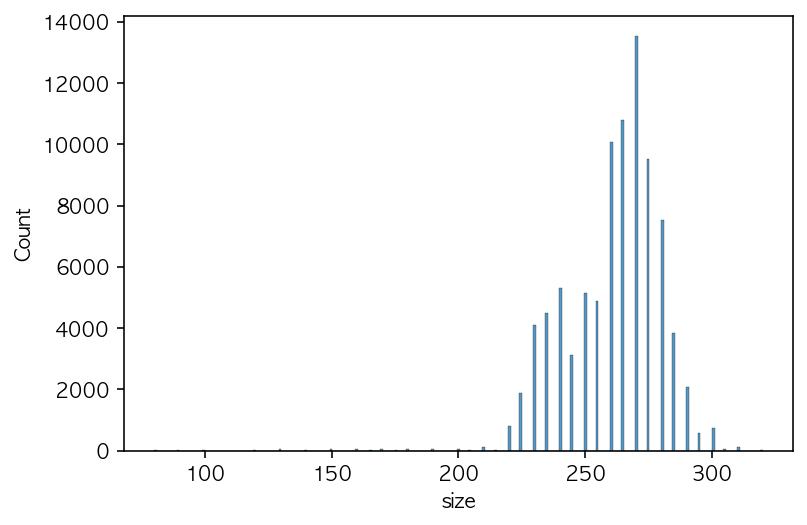

In [56]:
sns.histplot(df['size'])

### color
- color1, color2, color3, color4 추가
- color_count 추가
- multicolor 컬럼 추가
- 색상은 price가 아닌 transactions와 연관이 있어보임.

In [57]:
df['color_count'] = df['color'].apply(lambda x : len(x.split('/')))

In [58]:
df['color_count'].value_counts()

2    52958
3    24673
4     7881
1     2664
5     1045
Name: color_count, dtype: int64

In [59]:
pd.pivot_table(df, index='color_count', values='price', aggfunc='mean')

,price
color_count,
1,143566.816817
2,197302.881529
3,200204.758238
4,175503.870067
5,195287.081340


In [60]:
# 트리플 화이트 = 단색
# df[df['color'] == 'WHITE/WHITE/WHITE']

In [61]:
# df[df['color'] == 'BLACK/WHITE-RED-BLUE']

In [62]:
# df[df['color'] == 'WHITE/MULTI-COLOR/WHITE']

In [75]:
# multicolor가 아닌 것은 가격대가 낮다
df.loc[df['color_count']==1, 'multicolor'] = False
df.loc[df['color_count']!=1, 'multicolor'] = True
df.loc[df['color'] == 'WHITE/WHITE', 'multicolor'] = False
df.loc[df['color'] == 'BLACK/BLACK', 'multicolor'] = False
df.loc[df['color'] == 'WHITE/WHITE/WHITE', 'multicolor'] = False
df.loc[df['color'] == 'WHITE/WHITE-WHITE', 'multicolor'] = False
df.loc[df['color'] == 'BLACK/BLACK/BLACK', 'multicolor'] = False
df.loc[df['color'] == 'BLACK/BLACK-BLACK', 'multicolor'] = False
df.loc[df['color'] == 'WHITE/WHITE/WHITE/WHITE', 'multicolor'] = False

In [76]:
df['multicolor'].value_counts()

True     56492
False    32729
Name: multicolor, dtype: int64

In [77]:
pd.pivot_table(df, index='multicolor', values='price', aggfunc='median')

,price
multicolor,
False,150000
True,170000


In [79]:
df[df['color_count']==2]['color'].value_counts().head(50)

WHITE/WHITE                              13109
WHITE/WHITE-WHITE                         7569
BLACK/BLACK                               2708
BLACK/BLACK-BLACK                         2582
WHITE/BLACK                               1605
FLAX/FLAX-GUMLIGHTBROWN                   1450
COCONUTMILK/WHITE-UNIVERSITYRED           1450
WHITE/WHITE-BLACK                         1426
WHITE/WHITE-METALLICGOLD                  1059
WHEAT/WHEAT-DARKMOCHA                     1029
WHITE/BLACK-WHITE-WHITE                    950
WHITE/BLACK-WHITE                          891
MULTI-COLOR/MUTEDBRONZE-FOSSIL             881
WHITE/ORANGE-SUMMITWHITE-SAIL              853
WHITE/MALACHITE-WHITE-WHITE                735
FLAX/WHEAT-GUMLIGHTBROWN                   731
WHITE/UNIVERSITYRED-WHITE                  642
PEARLWHITE/PALEIVORY-PECAN                 570
BLACK/FLTSILVER-WHITE-PINEGREEN            503
WHITE/WHITE-HYPERROYAL                     482
WHITE/WHITE-MIDNIGHTNAVY-GUMYELLOW         479
MULTI-COLOR/M

In [74]:
df[['product','color']].value_counts().head(20)

product                                            color                               
Nike x Supreme Air Force 1 Low White               WHITE/WHITE-WHITE                       5950
Nike Air Force 1 '07 Low White                     WHITE/WHITE                             5950
(W) Nike Air Force 1 '07 Low White                 WHITE/WHITE                             4950
Nike Air Force 1 '07 LV8 Paisley Swoosh            RATTAN/PALEIVORY/BLACK                  3664
Nike x Stussy Air Force 1 Low Triple Black         BLACK/BLACK/BLACK                       2950
Nike Air Force 1 B Silver Snake                    BLACK/SILVER/BLACK                      2846
Nike Air Force 1 '07 Low Triple Black              BLACK/BLACK                             2597
Nike x Supreme Air Force 1 Low Black               BLACK/BLACK-BLACK                       2200
Nike Air Force 1 '07 LV8 Coffee                    BEACH/GRAIN/PALEIVORY/MAHOGANY          1654
Nike Air Force 1 '07 QS Valentine's Day         

In [80]:
def color_slash(x):
    if x.count('/') == 0:
        return x + '////'
    elif x.count('/') == 1:
        return x + '///'
    elif x.count('/') == 2:
        return x + '//'
    elif x.count('/') == 3:
        return x + '/'
    elif x.count('/') == 4:
        return x

In [81]:
df['color_list'] = df['color'].apply(color_slash).apply(lambda x : x.split('/'))

In [82]:
df.head(3)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color_list
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-13.815511,4.343805,Female,W,2,True,"[WHITE, GAMEROYAL-UNIVERSITYRED, , , ]"
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-13.815511,4.343805,Female,W,2,True,"[WHITE, GAMEROYAL-UNIVERSITYRED, , , ]"
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-13.815511,4.343805,Female,W,2,True,"[WHITE, GAMEROYAL-UNIVERSITYRED, , , ]"


In [83]:
df['color_list'].apply(lambda x: len(x)).value_counts()

5    89221
Name: color_list, dtype: int64

In [84]:
df['color1'] = df['color_list'].apply(lambda x : x[0])
df['color2'] = df['color_list'].apply(lambda x : x[1])
df['color3'] = df['color_list'].apply(lambda x : x[2])
df['color4'] = df['color_list'].apply(lambda x : x[3])
df['color5'] = df['color_list'].apply(lambda x : x[4])

In [85]:
df = df.drop(['color_list'], axis=1)

### Collabo
- Collabo 컬럼 생성
- Collabo_brand 컬럼 생성
- Collabo_class 컬럼 생성

In [86]:
df['product'].value_counts()

Nike Air Force 1 '07 Low White                                5950
Nike x Supreme Air Force 1 Low White                          5950
(W) Nike Air Force 1 '07 Low White                            4950
Nike Air Force 1 '07 LV8 Paisley Swoosh                       3664
Nike x Stussy Air Force 1 Low Triple Black                    2950
                                                              ... 
(W) Nike Air Force 1 High Utility 2.0 Black Gum                  1
(TD) Nike Force 1 White Fuchsia Glow                             1
(W) Nike Air Force 1 '07 Pink Oxford Fur                         1
(W) Nike Air Force 1 '07 LXX Next Nature Pearl White Quilt       1
Nike Air Force 1 High BHM 2018                                   1
Name: product, Length: 334, dtype: int64

In [87]:
df['Collabo'] = df['product'].str.contains(' x ', regex=False)

In [88]:
df['Collabo'].value_counts()

False    70999
True     18222
Name: Collabo, dtype: int64

In [89]:
pd.set_option('display.float_format','{:.0f}'.format)

In [90]:
pd.pivot_table(df[df['Collabo']==True], index=['product'], values='price', aggfunc='mean').sort_values(by='price', ascending=False)

,price
product,
Nike x Off-White Air Force 1 '07 University Gold,2491250
Nike x Off-White Air Force 1 Low The Ten,2403429
Nike x Off-White Air Force 1 Low MCA University Blue,2355182
Nike x Travis Scott Air Force 1 Low White,1660200
Nike x Travis Scott Air Force 1 Low Sail,1579286
Nike x Comme des Garcons Shirt x Supreme Air Force 1 Low Eyes,1108143
Nike x Off-White Air Force 1 Low Black White,994085
Nike x Off-White Air Force 1 Low Volt,866102
Nike x Supreme Air Force 1 High World Famous Red,816417


In [91]:
df.loc[df['Collabo'] ,['product','Collabo']].value_counts()

product                                                            Collabo
Nike x Supreme Air Force 1 Low White                               True       5950
Nike x Stussy Air Force 1 Low Triple Black                         True       2950
Nike x Supreme Air Force 1 Low Black                               True       2200
Nike x Supreme Air Force 1 Low Flax                                True       1450
Nike x Space Jam: A New Legacy Air Force 1 '07 Tune Squad          True        947
Nike x Travis Scott Air Force 1 Low Cactus Jack                    True        823
Nike x Comme des Garcons Homme Plus Air Force Mid White            True        624
Nike x Ruohan Wang Air Force 1 Low Flyleather                      True        469
Nike x Comme des Garcons Homme Plus Air Force Mid Black            True        287
Nike x Off-White Air Force 1 Low Black White                       True        199
Nike x Off-White Air Force 1 Low Volt                              True        177
Nike x NBA A

In [433]:
# df.loc[df['Collabo']==True, 'product'][6162].find('SB') != -1

In [92]:
def extract_collabo(x):
    if x.find('Air') != -1:
        r1 = x.find('Nike')
        r2 = x.find('Air')
        return x[r1+7:r2-1]
    elif x.find('Air') == -1:
        r1 = x.find('Nike')
        r2 = x.find('Force')
        return x[r1+7:r2-1]

In [93]:
df.loc[df['Collabo']==True, 'product'].apply(extract_collabo).value_counts()

Supreme                              9702
Stussy                               3415
Space Jam: A New Legacy              1087
Comme des Garcons Homme Plus          911
Travis Scott                          905
Off-White                             469
Ruohan Wang                           469
NBA                                   349
Clot                                  110
Kith                                  108
Carhartt WIP                           95
Comme des Garcons Shirt x Supreme      92
1017 Alyx 9SM                          80
Swarovski                              69
Olivia Kim                             64
Acronym Lunar                          53
Mayumi Yamase                          50
A-Cold-Wall                            43
Cactus Plant Flea Market               34
Just Don                               29
Riccardo Tisci                         19
Steve Harrington                       18
Clot x Fragment                        18
A Ma Maniere                      

In [94]:
df['Collabo_brand'] = df.loc[df['Collabo']==True, 'product'].apply(extract_collabo)

In [95]:
df.loc[df['Collabo']==True, ['product', 'Collabo_brand']].value_counts()

product                                                            Collabo_brand                    
Nike x Supreme Air Force 1 Low White                               Supreme                              5950
Nike x Stussy Air Force 1 Low Triple Black                         Stussy                               2950
Nike x Supreme Air Force 1 Low Black                               Supreme                              2200
Nike x Supreme Air Force 1 Low Flax                                Supreme                              1450
Nike x Space Jam: A New Legacy Air Force 1 '07 Tune Squad          Space Jam: A New Legacy               947
Nike x Travis Scott Air Force 1 Low Cactus Jack                    Travis Scott                          823
Nike x Comme des Garcons Homme Plus Air Force Mid White            Comme des Garcons Homme Plus          624
Nike x Ruohan Wang Air Force 1 Low Flyleather                      Ruohan Wang                           469
Nike x Comme des Garcons Ho

In [96]:
df.loc[df['Collabo']==False, 'Collabo_brand'] = 'None'

In [97]:
df[df['Collabo_brand'].isnull()][['product', 'Collabo']].value_counts()

Series([], dtype: int64)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89221 entries, 0 to 89220
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           89221 non-null  int64  
 1   price          89221 non-null  int64  
 2   date           89221 non-null  object 
 3   product        89221 non-null  object 
 4   release_date   89221 non-null  object 
 5   color          89221 non-null  object 
 6   release_price  89221 non-null  int64  
 7   type           89221 non-null  object 
 8   brand          89221 non-null  object 
 9   category       89221 non-null  object 
 10  number         89221 non-null  int64  
 11  wish           89221 non-null  int64  
 12  review         89221 non-null  int64  
 13  transactions   89221 non-null  int64  
 14  review_log     89221 non-null  float64
 15  wish_log       89221 non-null  float64
 16  size_target    89221 non-null  object 
 17  size_type      89221 non-null  object 
 18  color_

In [99]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['product']

In [100]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand'] = 'S.P.O.T. x Lance Mountain'

In [101]:
# df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand']

In [102]:
df.groupby('Collabo_brand')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
Collabo_brand,,
Olivia Kim,138516,64
NBA,146086,349
Space Jam: A New Legacy,154508,1087
None,164491,70999
Ruohan Wang,175190,469
Carhartt WIP,205579,95
PSNY,221000,7
Clot Lunar,227308,13
Mayumi Yamase,239180,50


In [103]:
df.loc[df['Collabo_brand'] == 'Off-White'].groupby('product')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
product,,
(TD) Nike x Off-White Air Force 1 Low Black White,189000,28
(TD) Nike x Off-White Air Force 1 Low Volt,289625,16
Nike x Off-White Air Force 1 Low Volt,866102,177
Nike x Off-White Air Force 1 Low Black White,994085,199
Nike x Off-White Air Force 1 Low MCA University Blue,2355182,22
Nike x Off-White Air Force 1 Low The Ten,2403429,7
Nike x Off-White Air Force 1 '07 University Gold,2491250,20


In [104]:
# # 브랜드 카테고리 분류 (기준을 정확히 잡아야 함)
# def make_class(x):
#     if x in ['NBA', 'Quartersnacks', 'Parra']:
#         return 'Normal'
#     elif x in ['Off-White', 'Kasina']:
#         return 'Preminum'
#     elif x in ['Frame Skate', 'StrangeLove', 'Supreme', 'Travis Scott']:
#         return 'Highend'
#     else:
#         return 'None'

In [105]:
# df.loc[df['Collabo_brand'].apply(make_class) == 'Normal', 'Collabo_class'] = 'Normal'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Preminum', 'Collabo_class'] = 'Preminum'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Highend', 'Collabo_class'] = 'Highend'
# df.loc[df['Collabo_brand'].apply(make_class) == 'None', 'Collabo_class'] = 'None'

In [106]:
# df[['product','Collabo_brand', 'Collabo_class']].value_counts()

### date
- after_day 컬럼 생성
- date, release_date : unix 타임스탬프 형식으로 변환

In [107]:
df['date']

0        2020-10-25
1        2021-03-03
2        2021-08-08
3        2021-05-22
4        2021-05-23
            ...    
89216    2022-01-07
89217    2022-01-07
89218    2022-01-07
89219    2022-01-07
89220    2022-01-08
Name: date, Length: 89221, dtype: object

In [108]:
df['date'] = pd.to_datetime(df['date'])
df['release_date'] = pd.to_datetime(df['release_date'])

In [109]:
print(df.shape)
df.head()

(89221, 27)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None
3,235,179000,2021-05-22,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,0,6,Female,GS,3,True,WHITE,LIGHTARMORYBLUE,ARCTICPUNCH,,,False,None
4,245,189000,2021-05-23,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,0,6,Female,GS,3,True,WHITE,LIGHTARMORYBLUE,ARCTICPUNCH,,,False,None


In [110]:
df['after_day'] = df['date'] - df['release_date']

In [111]:
df['after_day'] = df['after_day'].dt.days

In [112]:
df

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None,8
1,235,120000,2021-03-03,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None,137
2,270,198000,2021-08-08,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None,295
3,235,179000,2021-05-22,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,0,6,Female,GS,3,True,WHITE,LIGHTARMORYBLUE,ARCTICPUNCH,,,False,None,115
4,245,189000,2021-05-23,(GS) Nike Air Force 1 LV8 Double Swoosh,2021-01-27,WHITE/LIGHTARMORYBLUE/ARCTICPUNCH,108300,etc,Nike,Nike Air Force,32108,332,1,6,0,6,Female,GS,3,True,WHITE,LIGHTARMORYBLUE,ARCTICPUNCH,,,False,None,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89216,270,241000,2022-01-07,(W) Nike Air Force 1 Fontanka Pearl White,2021-10-18,PEARLWHITE/PEARLWHITE/UNIVERSITYRED/PEARLWHITE,149000,etc,Nike,Nike Air Force,43413,1310,15,418,3,7,Female,W,4,True,PEARLWHITE,PEARLWHITE,UNIVERSITYRED,PEARLWHITE,,False,None,81
89217,220,295000,2022-01-07,(W) Nike Air Force 1 Fontanka Pearl White,2021-10-18,PEARLWHITE/PEARLWHITE/UNIVERSITYRED/PEARLWHITE,149000,etc,Nike,Nike Air Force,43413,1310,15,418,3,7,Female,W,4,True,PEARLWHITE,PEARLWHITE,UNIVERSITYRED,PEARLWHITE,,False,None,81
89218,220,299000,2022-01-07,(W) Nike Air Force 1 Fontanka Pearl White,2021-10-18,PEARLWHITE/PEARLWHITE/UNIVERSITYRED/PEARLWHITE,149000,etc,Nike,Nike Air Force,43413,1310,15,418,3,7,Female,W,4,True,PEARLWHITE,PEARLWHITE,UNIVERSITYRED,PEARLWHITE,,False,None,81
89219,235,218000,2022-01-07,(W) Nike Air Force 1 Fontanka Pearl White,2021-10-18,PEARLWHITE/PEARLWHITE/UNIVERSITYRED/PEARLWHITE,149000,etc,Nike,Nike Air Force,43413,1310,15,418,3,7,Female,W,4,True,PEARLWHITE,PEARLWHITE,UNIVERSITYRED,PEARLWHITE,,False,None,81


In [113]:
# after_day >= 0 만 선택
df = df[df['after_day'] >= 1]

<AxesSubplot:xlabel='after_day', ylabel='Count'>

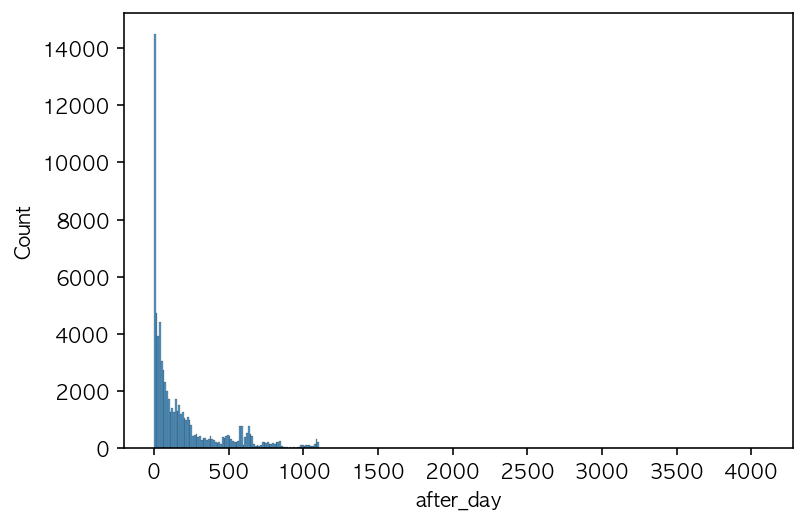

In [114]:
sns.histplot(df['after_day'])

<AxesSubplot:xlabel='after_day', ylabel='Count'>

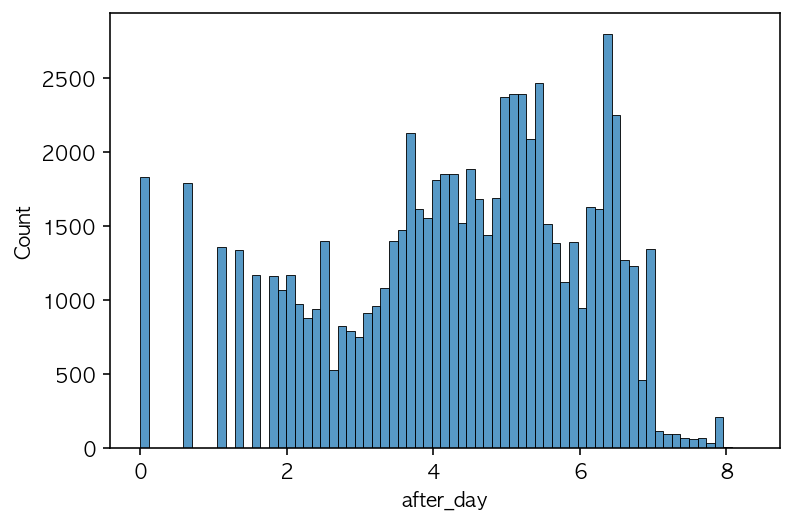

In [115]:
sns.histplot(np.log(df['after_day']+0.000001))

In [116]:
df['after_day_log'] = np.log(df['after_day'] + 0.000001)

In [117]:
df[df['after_day'] == 0].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

Series([], Name: price, dtype: int64)

In [118]:
df[df['after_day'] == 1].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

product
(W) Nike x Swarovski Air Force 1 LXX Triple Black   564000
(W) Nike x Swarovski Air Force 1 LXX Triple White   556143
Nike x Stussy Air Force 1 Low Triple Black          289910
Nike Air Force 1 '07 QS Valentine's Day             257975
Nike Air Force 1 '07 LV8 Paisley Swoosh             213624
Name: price, dtype: float64

In [119]:
import datetime as dt
# 유닉스 타임스탬프로 바꾸기
df['date_unix'] = df['date'].map(dt.datetime.toordinal)
df['release_date_unix'] = df['release_date'].map(dt.datetime.toordinal)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74307 entries, 0 to 89220
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   size               74307 non-null  int64         
 1   price              74307 non-null  int64         
 2   date               74307 non-null  datetime64[ns]
 3   product            74307 non-null  object        
 4   release_date       74307 non-null  datetime64[ns]
 5   color              74307 non-null  object        
 6   release_price      74307 non-null  int64         
 7   type               74307 non-null  object        
 8   brand              74307 non-null  object        
 9   category           74307 non-null  object        
 10  number             74307 non-null  int64         
 11  wish               74307 non-null  int64         
 12  review             74307 non-null  int64         
 13  transactions       74307 non-null  int64         
 14  review

### Correlation

In [121]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None,8,2,737723,737715


In [122]:
heatmap_data = df[["price", "size", "date_unix", "release_date_unix", "release_price", "wish", "review", "transactions", 'after_day', 'Collabo', 'color_count', 'multicolor', 'review_log', 'wish_log', 'after_day_log']]

<AxesSubplot:title={'center':'Person Correlation of Features'}>

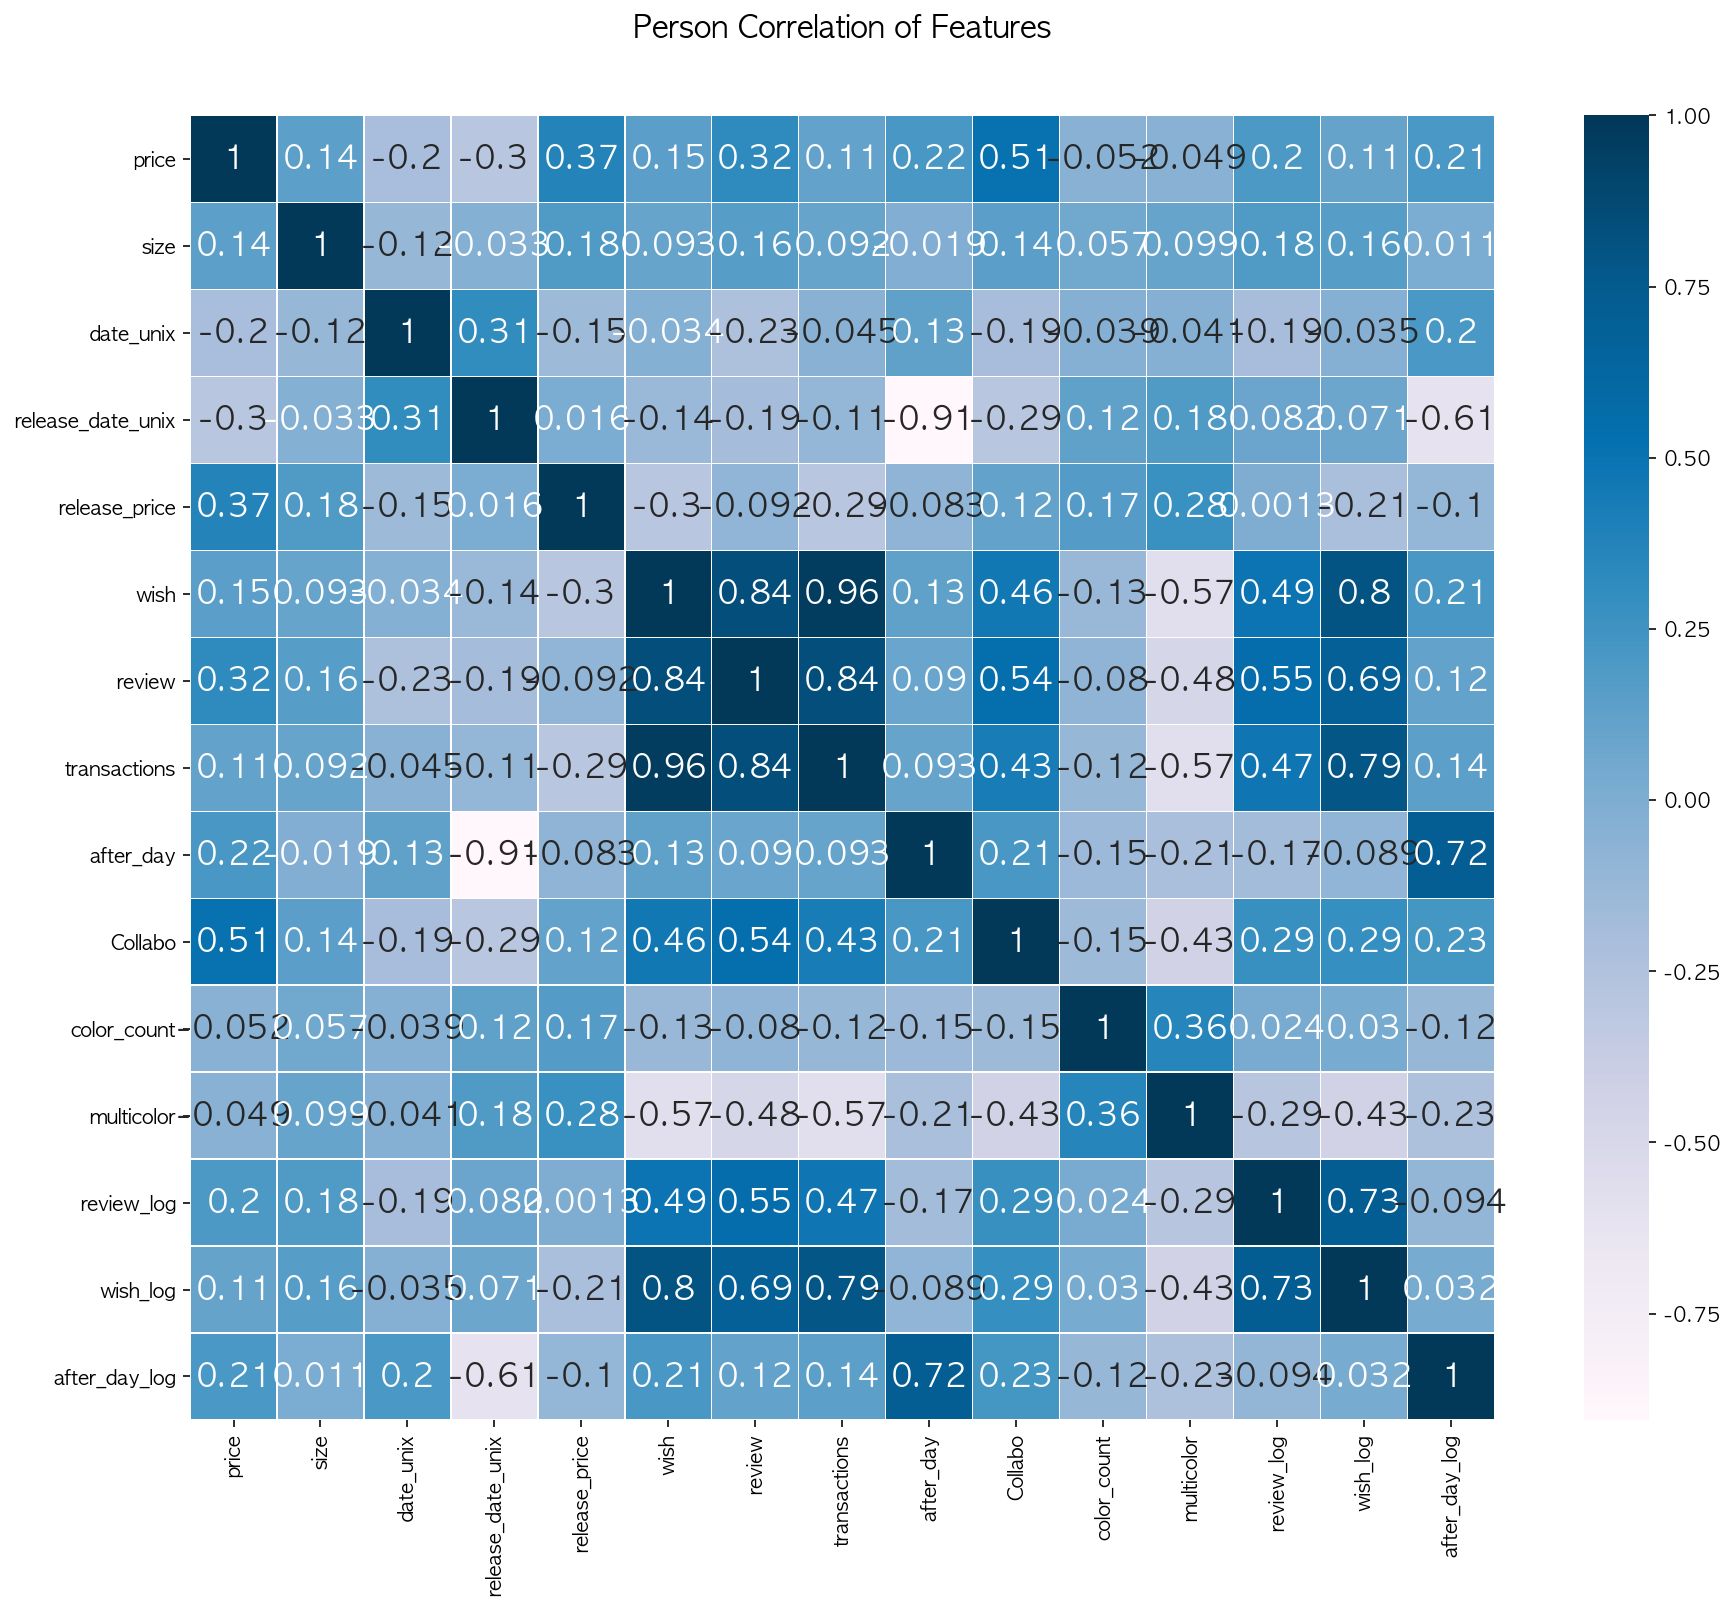

In [123]:
colormap = plt.cm.PuBu
plt.figure(figsize=(16, 12))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0
            , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

#### price (Target)

<AxesSubplot:xlabel='price', ylabel='Count'>

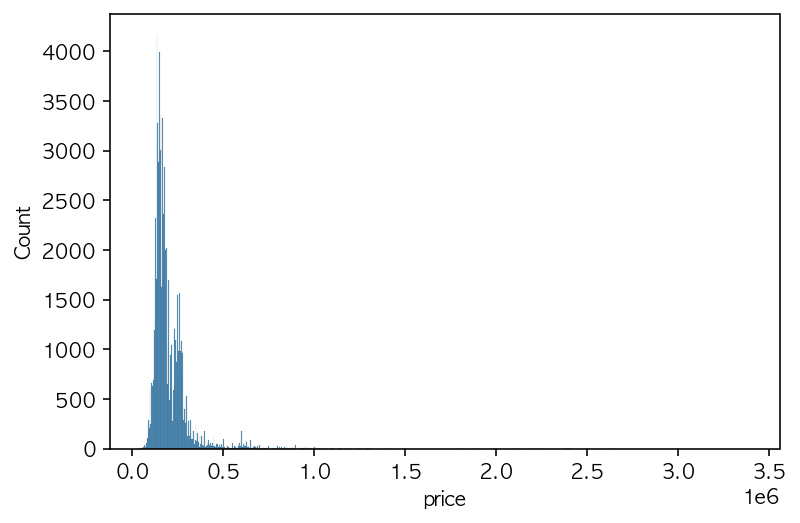

In [124]:
sns.histplot(df['price'])

In [125]:
df.describe()

,size,price,release_price,number,wish,review,transactions,review_log,wish_log,color_count,after_day,after_day_log,date_unix,release_date_unix
count,74307,74307,74307,74307,74307,74307,74307,74307,74307,74307,74307,74307,74307,74307
mean,261,203369,149680,30083,5447,174,1703,4,8,3,217,4,737995,737778
std,20,121427,38472,9616,6004,212,1678,3,1,1,312,2,139,325
min,80,45000,59000,36,11,0,1,-14,2,1,1,0,737458,734058
25%,250,145000,129000,23793,1478,25,469,3,7,2,22,3,737904,737692
50%,265,170000,139000,29189,3458,81,1214,4,8,2,91,5,738036,737850
75%,275,235000,169000,36175,7295,230,2597,5,9,3,267,6,738109,737993
max,320,3390000,599000,47691,22000,670,5950,7,10,5,4076,8,738163,738146


<AxesSubplot:xlabel='price', ylabel='Count'>

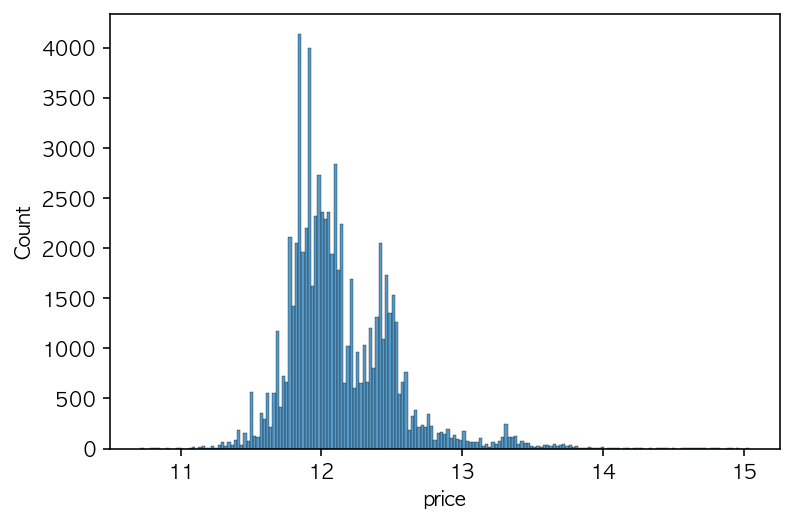

In [126]:
sns.histplot(np.log(df['price']+0.000001))

In [127]:
df = df.reset_index(drop=True)

In [128]:
df.to_csv('data/nike_air_force(model).csv')

In [129]:
df.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,240,180000,2020-10-25,(W) Nike Air Force 1 LXX Game Royal University...,2020-10-17,WHITE/GAMEROYAL-UNIVERSITYRED,132300,etc,Nike,Nike Air Force,25996,77,0,3,-14,4,Female,W,2,True,WHITE,GAMEROYAL-UNIVERSITYRED,,,,False,None,8,2,737723,737715


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74307 entries, 0 to 74306
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   size               74307 non-null  int64         
 1   price              74307 non-null  int64         
 2   date               74307 non-null  datetime64[ns]
 3   product            74307 non-null  object        
 4   release_date       74307 non-null  datetime64[ns]
 5   color              74307 non-null  object        
 6   release_price      74307 non-null  int64         
 7   type               74307 non-null  object        
 8   brand              74307 non-null  object        
 9   category           74307 non-null  object        
 10  number             74307 non-null  int64         
 11  wish               74307 non-null  int64         
 12  review             74307 non-null  int64         
 13  transactions       74307 non-null  int64         
 14  review

### Drop Duplicates
- 중복 제거 하지 않는 것이 성능이 더 높음.

In [ ]:
# df = df.drop_duplicates().reset_index(drop=True)

In [229]:
print(df.shape)

(290906, 30)


## Preprocessing for Modeling

In [671]:
dataset = pd.get_dummies(df, columns = ['size_target', 'multicolor', 'Collabo_class'])

In [672]:
print(dataset.shape)
dataset.head()

(158192, 33)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,size_target_Female,size_target_Kids,size_target_Male,multicolor_False,multicolor_True,Collabo_class_Highend,Collabo_class_None,Collabo_class_Normal,Collabo_class_Preminum
16,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
17,250,119000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
18,235,124000,738108,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,7,1,0,0,0,1,0,1,0,0
19,255,149000,738112,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,11,1,0,0,0,1,0,1,0,0
20,240,120000,738118,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,17,1,0,0,0,1,0,1,0,0


In [673]:
dataset.loc[dataset['Collabo'] == True, 'Collabo'] = 1
dataset.loc[dataset['Collabo'] == False, 'Collabo'] = 0

In [680]:
pd.set_option('display.float_format','{:.2f}'.format)
corr = dataset.corr()['price'].sort_values(ascending=False)

In [688]:
corr

price                     1.00
Collabo_class_Highend     0.66
release_price             0.46
Collabo_class_Preminum    0.45
size_target_Male          0.35
after_day                 0.29
size                      0.28
review_log                0.25
review                    0.11
multicolor_True           0.10
wish_log                  0.05
wish                      0.00
transactions              0.00
Collabo_class_Normal     -0.03
color_count              -0.10
multicolor_False         -0.10
size_target_Kids         -0.19
size_target_Female       -0.27
date                     -0.28
number                   -0.35
release_date             -0.44
Collabo_class_None       -0.60
Name: price, dtype: float64

In [687]:
columns = corr[:11].index

In [721]:
y_label = dataset['price']
# x_data = dataset.drop(['price', 'date', 'product', 'release_date', 'color', 'brand', 'category', 'number', 'color_count', 'color1', 'color2', 'color3', 'color4', 'Collabo', 'Collabo_brand', 'multicolor_True', 'multicolor_False'], axis=1)
x_data = dataset[columns].drop(['price','review'], axis=1)

In [722]:
print(x_data.shape)
x_data.head()

(158192, 9)


,Collabo_class_Highend,release_price,Collabo_class_Preminum,size_target_Male,after_day,size,review_log,multicolor_True,wish_log
16,0,129000,0,0,0,235,1.39,1,4.53
17,0,129000,0,0,0,250,1.39,1,4.53
18,0,129000,0,0,7,235,1.39,1,4.53
19,0,129000,0,0,11,255,1.39,1,4.53
20,0,129000,0,0,17,240,1.39,1,4.53


In [723]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [724]:
x_columns = x_data.columns

In [725]:
x_data = scaler.fit_transform(x_data)

In [726]:
print(x_data.shape)
x_data

(158192, 9)


array([[0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       ...,
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687]])

In [727]:
y_label = y_label.values.reshape(-1,1)

In [728]:
print(y_label.shape)
y_label

(158192, 1)


array([[125000],
       [119000],
       [124000],
       ...,
       [269000],
       [270000],
       [210000]])

In [729]:
# x_data.to_csv('data/X_data.csv', index=False)
# y_label.to_csv('data/y_label.csv', index=False)

In [730]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, train_size=0.8, random_state=45)

In [731]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(110734, 9) (47458, 9) (110734, 1) (47458, 1)


In [1056]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, train_size=0.7, random_state=45)

## Model Selection

- RandomForestRegressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- XGBRegressor : https://xgboost.readthedocs.io/en/stable/python/python_api.html
- LGBMRegressor
- CatBoostRegressor : https://catboost.ai/en/docs/concepts/python-reference_train

### 1. RandomForest

In [1057]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

In [1058]:
rfr = RandomForestRegressor()
# xgbr = XGBRegressor()
# lgbmr = LGBMRegressor()
# catr = CatBoostRegressor()
# # xgbr = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
# #                            colsample_bytree=1, max_depth=7)

In [1059]:
rfr.fit(X_train_val, y_train_val)
# xgbr.fit(X_train,y_train)
# lgbmr.fit(X_train, y_train)
# catr.fit(X_train, y_train)

RandomForestRegressor()

In [1060]:
from sklearn.metrics import mean_squared_error

rfr_pred = rfr.predict(X_test_val)
# xgbr_pred = xgbr.predict(X_test)
# lgbmr_pred = lgbmr.predict(X_test)
# catr_pred = catr.predict(X_test)

rfr_mse = mean_squared_error(y_test_val, rfr_pred)
# xgbr_mse = mean_squared_error(y_test, xgbr_pred)
# lgbmr_mse = mean_squared_error(y_test, lgbmr_pred)
# catr_mse = mean_squared_error(y_test, catr_pred)

rfr_rmse = np.sqrt(rfr_mse)
# xgbr_rmse = np.sqrt(xgbr_mse)
# lgbmr_rmse = np.sqrt(lgbmr_mse)
# catr_rmse = np.sqrt(catr_mse)

print(rfr_rmse)
# print(rfr_rmse, xgbr_rmse, lgbmr_rmse, catr_rmse)

21883.895708897653


In [1061]:
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(rfr_rmse)

21349.057169470372


In [1062]:
from sklearn.metrics import r2_score
r2_score(y_test, rfr_pred)

0.993887076143271

In [1064]:
print(1 - (1-rfr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

0.9968441158591359


In [737]:
X_train = pd.DataFrame(data = X_train, columns = x_columns)
y_train = pd.DataFrame(data = y_train, columns = ['price'])

In [738]:
index=rfr.feature_importances_.argsort()[::-1][0:-1]
index_imp=rfr.feature_importances_[index]
index_name=X_train.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

[('Collabo_class_Highend', 0.43398807733088735),
 ('Collabo_class_Preminum', 0.22939922641153962),
 ('review_log', 0.1324248508376564),
 ('release_price', 0.0647071670333954),
 ('after_day', 0.05577575553866152),
 ('wish_log', 0.04749870556515516),
 ('size_target_Male', 0.02232827250391282),
 ('size', 0.013563124235918572)]

Feature ranking:
1. feature Collabo_class_Highend (0.434)
2. feature Collabo_class_Preminum (0.229)
3. feature review (0.111)
4. feature release_price (0.059)
5. feature after_day (0.052)
6. feature wish (0.039)
7. feature transactions (0.039)
8. feature size_target_Male (0.022)
9. feature size (0.014)
10. feature Collabo_class_Normal (0.000)
11. feature Collabo_class_None (0.000)
12. feature size_target_Female (0.000)
13. feature size_target_Kids (0.000)


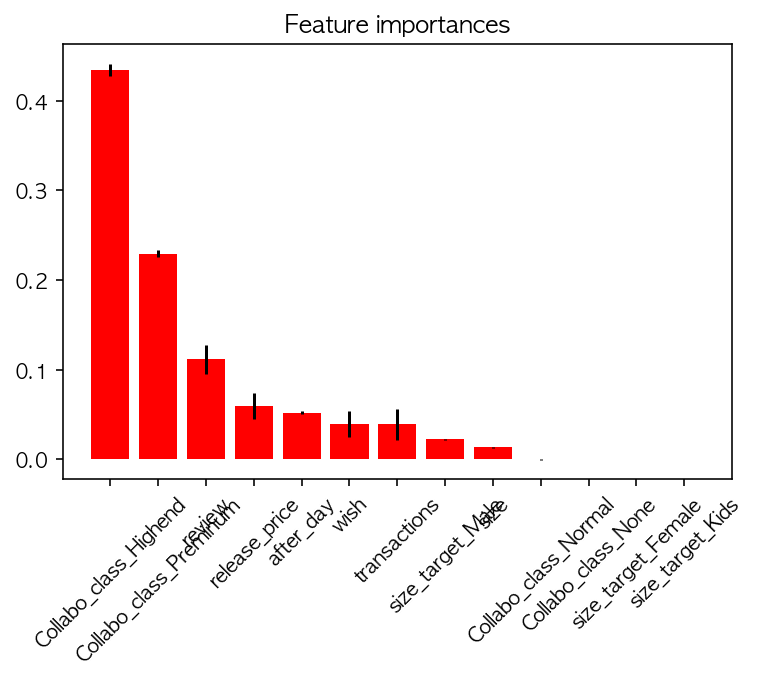

In [427]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [430]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,Collabo_class
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947.00,93.00,4.00,30,Female,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,None


### 2. CatBoost

In [527]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,Collabo_class,after_day
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,None,0


In [ ]:
from catboost import CatBoostRegressor

cat_features = []
X_train = 
y_train

### Featurn Selection
- https://data-newbie.tistory.com/608

In [ ]:
from BorutaShap import BorutaShap, load_data

X, y = load_data(data_type='regression')
X.head()
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(X_size=12, figsize=(19,8),
                      y_scale='log', which_features='all',)

In [ ]:
if self.importance_measure == 'shap':

self.explain()
vals = self.shap_values

if normalize:
vals = self.calculate_Zscore(vals)

X_feature_import = vals[:len(self.X.columns)]
Shadow_feature_import = vals[len(self.X_shadow.columns):]


elif self.importance_measure == 'gini':

feature_importances_ =  np.abs(self.model.feature_importances_)

if normalize:
feature_importances_ = self.calculate_Zscore(feature_importances_)

X_feature_import = feature_importances_[:len(self.X.columns)]
Shadow_feature_import = feature_importances_[len(self.X.columns):]

else:

raise ValueError('No Importance_measure was specified select one of (shap, gini)')

## 하이퍼파라미터 튜닝

In [1357]:
dataset['release_price'].mean()

125574.04103873773

In [1356]:
dataset['price'].median()

280000.0

### 1. Grid Search
- https://www.kaggle.com/jayatou/xgbregressor-with-gridsearchcv

In [1354]:
# RF
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [1359]:
pred = grid_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

46991.65224387363

In [1207]:
# XGB
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgbr = XGBRegressor()
xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_data, y_label)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


KeyboardInterrupt: 

In [1205]:
r_sq = xgbr.score(X_train, y_train)
print(r_sq)

0.9859814866931647


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

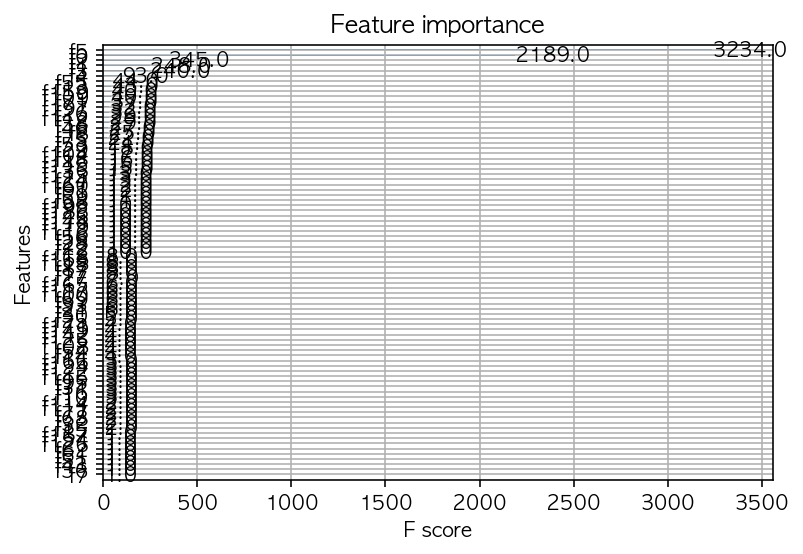

In [1141]:
xgboost.plot_importance(xgbr)

### 2. Optuna 활용
- 출처 : https://www.kaggle.com/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna
- 매우 오래걸리네..

In [ ]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['mse', 'mae'])
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 10000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    
    regr = RandomForestRegressor(bootstrap = bootstrap, criterion = criterion,
                                 max_depth = max_depth, max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2)
    
    
    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)
    
    score = cross_val_score(regr, X_train, y_train, cv=5, scoring="r2")
    r2_mean = score.mean()

    return r2_mean

In [ ]:
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

#Create an instance with tuned hyperparameters
optimised_rf = RandomForestRegressor(bootstrap = study.best_params['bootstrap'], criterion = study.best_params['criterion'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     max_leaf_nodes = study.best_params['max_leaf_nodes'],n_estimators = study.best_params['n_estimators'],
                                     n_jobs=2)
#learn
optimised_rf.fit(X_train ,y_train)

In [1017]:
import optuna

import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1018]:
def objective(trial,data=x_data,target=y_label):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
#         'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [1019]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-01-05 13:37:31,321] A new study created in memory with name: no-name-d85c40ef-64fa-40b2-8fbe-d22405379406


KeyboardInterrupt: 

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [ ]:
# direction : score 값을 최대 또는 최소로 하는 방향으로 지정 
study = optuna.create_study(direction='minimize',sampler=TPESampler())

# n_trials : 시도 횟수 (미 입력시 Key interrupt가 있을 때까지 무한 반복)
study.optimize(lambda trial : objectiveXGB(trial, X,  y, X_test), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

# Console 출력 예)
# Best trial: score 0.6918131483269861,
# params {'n_estimators': 1988, 'max_depth': 15, 'min_child_weight': 171, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.009025835256777458, 'alpha': 1.0684343216052703, 'subsample': 0.6} 

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)

### 3. Random Search

In [ ]:
# Coarse
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다. (loop)
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 "기하평균"을 통해 하나로 합칩니다. (트렌드적인 면모, 비율같은 것이 중요할 때 사용)
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
    # Mean Squared Logarithmic Error(MSLE)를 계산합니다.
    # 이후 여기에 numpy의 sqrt(square root)를 활용하여 루트 연산을 합니다.
    # 이 결과가 사실상 Root Mean Squared Logarithmic Error(RMSLE)가 됩니다.
    # 이를 score라는 이름의 변수에 할당합니다.
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

In [ ]:
# Fine
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
fine_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 40, high = 100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.8, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합칩니다.
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    fine_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# fine_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)

# 변환한 fine_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by="score")

# fine_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(fine_hyperparameters_list.shape)

# fine_hyperparameters_list의 상위 10개를 출력합니다.
fine_hyperparameters_list.head(10)

In [ ]:
# 가장 score가 낮게 나온(=좋은 정확도가 나온) 하이퍼패러미터를 가져옵니다.
# 이를 best_hyperparameters라는 이름의 변수에 저장합니다.
best_hyperparameters = fine_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터만 가져옵니다.
# 이를 best_max_depth라는 이름의 변수에 저장합니다.
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터만 가져옵니다.
# 이를 best_max_features라는 이름의 변수에 저장합니다.
best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력합니다.
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

In [ ]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
# best_max_depth = 97
# best_max_features = 0.897703
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)
model